In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [2]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

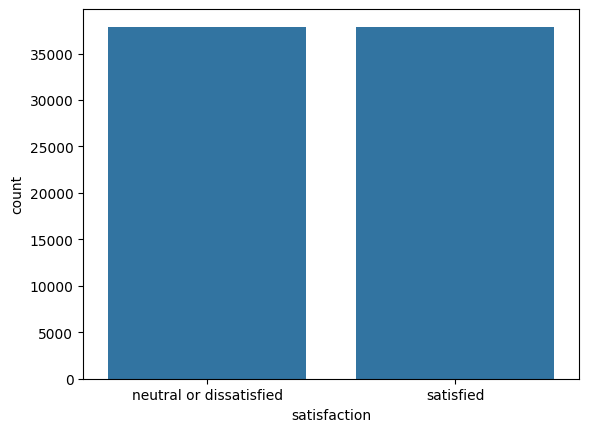

In [3]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [4]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,26,1127,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,28,1532,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,38,3496,3
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,31,1919,0


In [5]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17498508, -0.40604592, -0.49105237, ...,  0.01405142,
        -0.01520397, -0.53212404],
       [-0.17498508, -0.40604592,  2.03644268, ..., -0.90483687,
         0.72642375,  3.31612533],
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.90483687,
         0.06365489, -0.53212404],
       ...,
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.44539273,
         0.61655298,  1.32073677],
       [-0.17498508,  2.46277561, -0.49105237, ..., -1.36428102,
         0.81591527, -0.53212404],
       [-0.17498508, -0.40604592, -0.49105237, ..., -0.52196675,
        -0.64784698, -0.53212404]])

## Set paramiter CV

In [8]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.344777 วินาที


In [10]:
#Predict the accuracy of the model
y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 95.47 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     11333
              satisfied       0.96      0.95      0.95     11401

               accuracy                           0.95     22734
              macro avg       0.95      0.95      0.95     22734
           weighted avg       0.95      0.95      0.95     22734



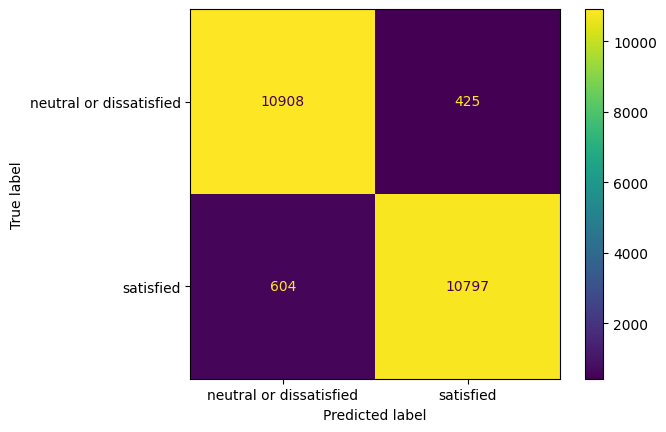

In [11]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

In [12]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")


Cross Validation Scores (Logistic Regression): [0.95419847 0.95080577 0.94939214 0.95476392 0.95589483 0.95306757
 0.95984163 0.95616516 0.95616516 0.95361991 0.96012443 0.96012443
 0.95673077 0.95588235 0.95050905]
Mean CV Accuracy: 0.9552
Standard Deviation CV Accuracy: 0.0033
เวลาที่ใช้ในการทำ Cross Validation: 6.573368 วินาที


In [13]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9557365305583833
Test Accuracy: 0.9547373977302719


## Save Model Predic

In [14]:
import pickle
pickle_out = open("../../pipelines/model_LR_business.pkl", mode = "wb")
pickle.dump(model_lr, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_LR.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [15]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
32392,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,40,2249,0,neutral or dissatisfied
994,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,25,3145,0,satisfied
37572,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,39,180,10,satisfied
18712,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,24,585,0,satisfied
21091,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,57,1180,18,satisfied
24992,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,36,583,1,neutral or dissatisfied
15882,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,25,1605,8,neutral or dissatisfied
60699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,42,420,0,neutral or dissatisfied
61078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,64,295,1,neutral or dissatisfied
26902,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,51,429,0,satisfied


In [16]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
32392,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,40,2249,0
994,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,25,3145,0
37572,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,39,180,10
18712,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,24,585,0
21091,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,57,1180,18
24992,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,36,583,1
15882,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,25,1605,8
60699,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,42,420,0
61078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,64,295,1
26902,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,51,429,0


In [17]:
y_sam = df_sam.iloc[:,-1]
y_sam


32392    neutral or dissatisfied
994                    satisfied
37572                  satisfied
18712                  satisfied
21091                  satisfied
24992    neutral or dissatisfied
15882    neutral or dissatisfied
60699    neutral or dissatisfied
61078    neutral or dissatisfied
26902                  satisfied
5635     neutral or dissatisfied
8900                   satisfied
43103    neutral or dissatisfied
52766    neutral or dissatisfied
52684                  satisfied
31064                  satisfied
53431                  satisfied
32704    neutral or dissatisfied
16819    neutral or dissatisfied
24702    neutral or dissatisfied
Name: satisfaction, dtype: object

In [18]:
model = pickle.load(open("../../pipelines/model_LR_business.pkl", 'rb'))
scaler_LR = pickle.load(open("../../pipelines/scaler_LR.pkl", 'rb'))

scaler_new = scaler_LR.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of LR is : {round(accuracy_KNN*100,2)} % .")

['neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
Accuracy of LR is : 95.0 % .
